In [1]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

In [1]:
df = pd.read_csv('New Data/whoosh finale.csv')

In [3]:
df0 = pd.read_csv('New Data/Whoose 28-25.csv', sep=';', encoding='unicode_escape')
df1 = pd.read_csv('New Data/Whoosh 01-29.csv', sep=';', encoding='unicode_escape')
df2 = pd.read_csv('New Data/Whoosh 02-02.csv', sep=';', encoding='unicode_escape')
df3 = pd.read_csv('New Data/Whoosh 06-03.csv', sep=';', encoding='unicode_escape')
df4 = pd.read_csv('New Data/Whoosh 09-07.csv', sep=';', encoding='unicode_escape')
df5 = pd.read_csv('New Data/Whoosh 13-10.csv', sep=';', encoding='unicode_escape')
df6 = pd.read_csv('New Data/Whoosh 19-15.csv', sep=';', encoding='unicode_escape')
df7 = pd.read_csv('New Data/Whoosh 24-20.csv', sep=';', encoding='unicode_escape')

### Preprocessing
~~note, selain @KeretaCepatID, ganti @apapun dengan @mention, for the sake of privacy~~

In [4]:
lexicon_df = pd.read_csv('Kamus Gaul/colloquial-indonesian-lexicon.csv', header=None, names=['slang', 'standard'], encoding='utf-8', usecols=[0, 1])

slang_to_standard = dict(zip(lexicon_df['slang'], lexicon_df['standard']))
slang_to_standard['dibikinin'] = 'dibikin'

# compile a regular expression object that matches any of the slang words
slang_regex = re.compile(r'\b({})\b'.format('|'.join(slang_to_standard.keys())))

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

special_dict = {
    "jakartabandung": "jakarta bandung",
    "jakartasurabaya": "jakarta surabaya",
    "halimtegalluar": "halim tegalluar",
    "halimtegal": "halim tegal",
    "halimpdl": "halim pdl",
    "halimpadalarang": "halim padalarang",
    "halimbandung": "halim bandung",
}

In [5]:
with open('stopwords-id.txt', 'r') as f:
    stopwords = set(f.read().splitlines())

def remove_punctuation(text):
    return re.sub(r'[^\w\s@]', '', text, re.UNICODE)

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# define the sanitize function
def sanitize(tweet):
    # replace all mentions with @mention
    # tweet = re.sub(r'@(?!(?:KeretaCepatID\b|mention\b))\w+', '@mention', tweet)
    # convert the tweets to lowercase
    tweet = tweet.lower()
    # replace the slang words with standard words using the regular expression object
    tweet = slang_regex.sub(lambda m: slang_to_standard[m.group(1)], tweet)
    # remove the punctuation using the 'remove_punctuation' function
    tweet = remove_punctuation(tweet)
    # split the tweet into words
    words = tweet.split()
    # stem the words using the stemmer, ignore @mention and @KeretaCepatID
    words = [stemmer.stem(word) for word in words]
    # add @ if the word is keretacepatid
    words = [word.replace('keretacepatid', '@keretacepatid') for word in words]
    # filter out the stopwords or starts with 'http' or 't.co' using a list comprehension
    words = [word for word in words if word not in stopwords and not word.startswith(('http', 't.co', 'amp'))]
    # special case
    words = [special_dict[word] if word in special_dict else word for word in words]

    return words

In [6]:
# sanitize the tweets from all df, and save the result to a 'sanitized_tweet' column, and combine all df into one
for df in [df0, df1, df2, df3, df4, df5, df6, df7]:
    df['sanitized_tweet'] = df['full_text'].apply(sanitize)

df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [7]:
# count how many duplicates from id_str
df['id_str'].duplicated().sum()

0

In [16]:
# save df
df.to_csv('New Data/whoosh finale.csv', index=False)

In [9]:
df.tail(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,sanitized_tweet
6856,Fri Oct 20 06:43:37 +0000 2023,1715257443142480100,Kejadian Penumpang Tertinggal Kereta Cepat Who...,0,0,0,0,in,791682170737668096,1715257443142480100,reni_marthalena,https://twitter.com/reni_marthalena/status/171...,"[tumpang, tinggal, kereta, cepat, whoosh, klar..."
6857,Fri Oct 20 06:41:52 +0000 2023,1715257003004874875,"@fajarnugros feeder KCIC, LRT jabodebek. semua...",0,0,0,0,in,233197872,1715194988970291269,MVRRFX,https://twitter.com/MVRRFX/status/171525700300...,"[fajarnugros, feeder, kcic, lrt, jabodebek, ku..."
6858,Fri Oct 20 06:40:25 +0000 2023,1715256639581016456,"@strike_bravo_b tol ke bandung udh ada, kereta...",0,0,0,0,in,1131261407696117760,1715212972119961739,liizil,https://twitter.com/liizil/status/171525663958...,"[strike bravo b, tol, bandung, kereta, kai, la..."
6859,Fri Oct 20 06:29:31 +0000 2023,1715253894731952226,"@KeretaCepatID min mau nanya, cara beli tiket ...",0,0,0,0,in,1641123066725175297,1715034927698424119,naathallah,https://twitter.com/naathallah/status/17152538...,"[@keretacepatid, min, beli, tiket, kereta, fee..."
6860,Fri Oct 20 06:28:03 +0000 2023,1715253525574561942,"@fajarnugros EMU LRT JABODEBEK BERMASALAH, KRD...",0,0,0,1,in,1590133242,1715194988970291269,garleana123,https://twitter.com/garleana123/status/1715253...,"[fajarnugros, emu, lrt, jabodebek, krd, feeder..."


### Wordcloud

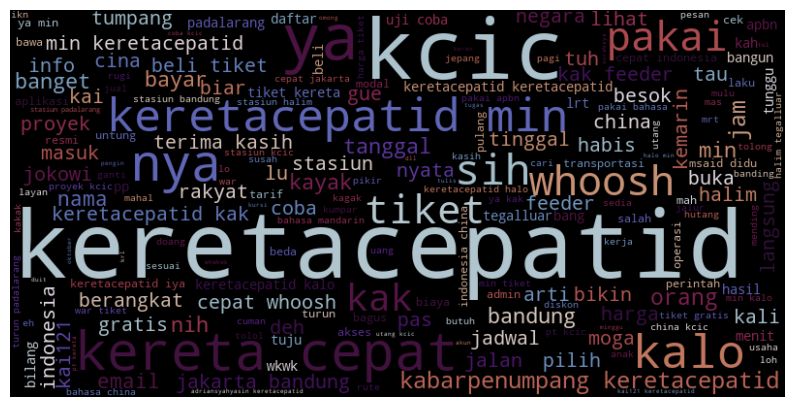

In [10]:
# wordcloud
# create a wordcloud object
wc = WordCloud(
    width=800,
    height=400,
    max_words=200,
    background_color='black',  # set background color to black
    colormap='twilight',  # use the twilight color map
    contour_width=3,  # add a contour around the wordcloud
    contour_color='steelblue',  # set the contour color
    random_state=42  # set a fixed random state for reproducibility
)
# generate the word cloud
wc.generate(' '.join(df['sanitized_tweet'].sum()))

# plot the wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# use tf-idf to vectorize the tweets and k-means to cluster the tweets
text = df['sanitized_tweet'].apply(lambda x: ' '.join(x))

# create a tf-idf vectorizer object
vectorizer = TfidfVectorizer()

# transform text into tf-idf matrix
X_tfidf = vectorizer.fit_transform(text)

# create a k-means clustering object
model = KMeans(n_clusters=10, random_state=0)

# fit the model to the tfidf matrix
model.fit(X_tfidf)

# get the cluster labels
labels = model.labels_

# add the cluster labels to the dataframe
df['cluster_10'] = labels

df.head(5)

d:\Root\Playground\Python\Penambangan Data\UTS\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,...,tweet_url,sanitized_tweet,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,Thu Sep 28 23:34:33 +0000 2023,1707539323032399891,@YellyLhsnhh @abetsym @rizqi_prima @dupadupp @...,0,2,0,0,in,237691856,1705195969896468684,...,https://twitter.com/RachmalinD/status/17075393...,"[yellylhsnhh, abetsym, rizqi prima, dupadupp, ...",1,3,4,4,4,2,0,8
1,Thu Sep 28 23:12:24 +0000 2023,1707533749330796708,@harjonoabi @SultanMafty @Adrianussatrio @Kere...,0,1,0,0,in,246178041,1707389414283043149,...,https://twitter.com/nurman307/status/170753374...,"[harjonoabi, sultanmafty, adrianussatrio, @ker...",1,3,4,4,4,0,8,4
2,Thu Sep 28 23:00:46 +0000 2023,1707530819672125637,Menteri Koordinator Bidang Kemaritiman dan Inv...,0,1,0,1,in,41730943,1707530819672125637,...,https://twitter.com/VIVAcoid/status/1707530819...,"[menteri, koordinator, bidang, maritim, invest...",0,1,1,3,5,4,6,2
3,Thu Sep 28 22:32:37 +0000 2023,1707523734729609507,@KeretaCepatID min @KeretaCepatID buka kuota g...,0,0,0,0,in,1477592515494625280,1707390525513621865,...,https://twitter.com/qafdhi/status/170752373472...,"[@keretacepatid, min, @keretacepatid, buka, ku...",2,2,0,5,0,7,2,1
4,Thu Sep 28 22:32:31 +0000 2023,1707523710180331675,@KeretaCepatID min @KeretaCepatID buka kuota g...,0,0,0,0,in,1477592515494625280,1705824417501298809,...,https://twitter.com/qafdhi/status/170752371018...,"[@keretacepatid, min, @keretacepatid, buka, ku...",2,2,0,5,0,7,2,1


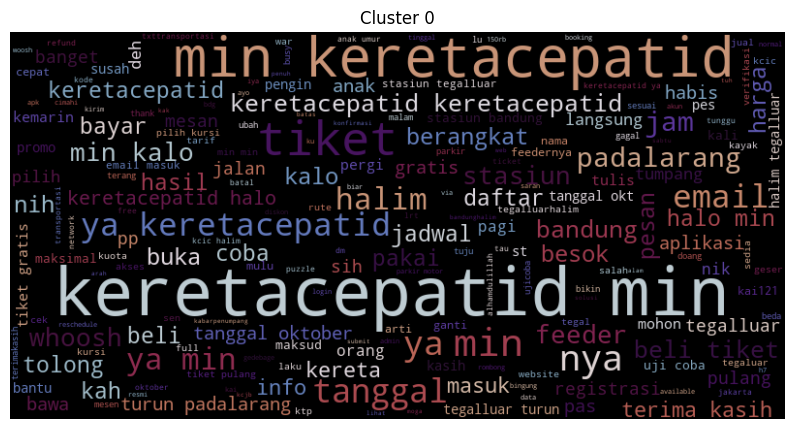

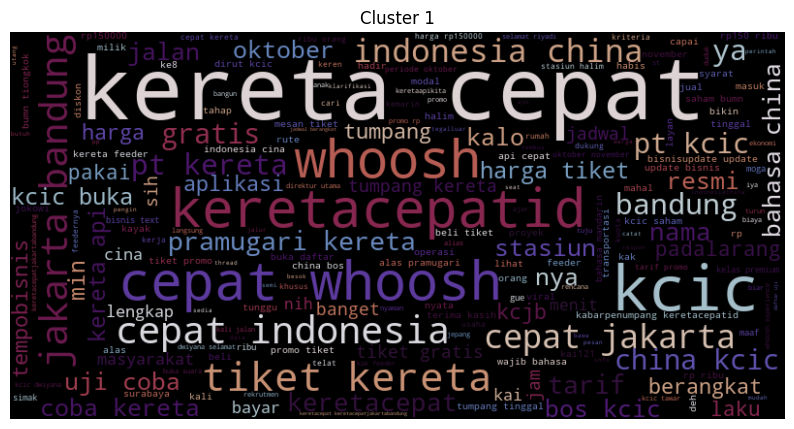

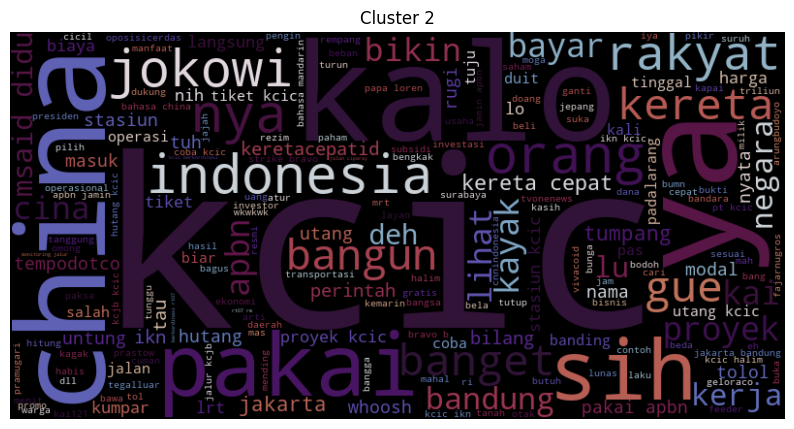

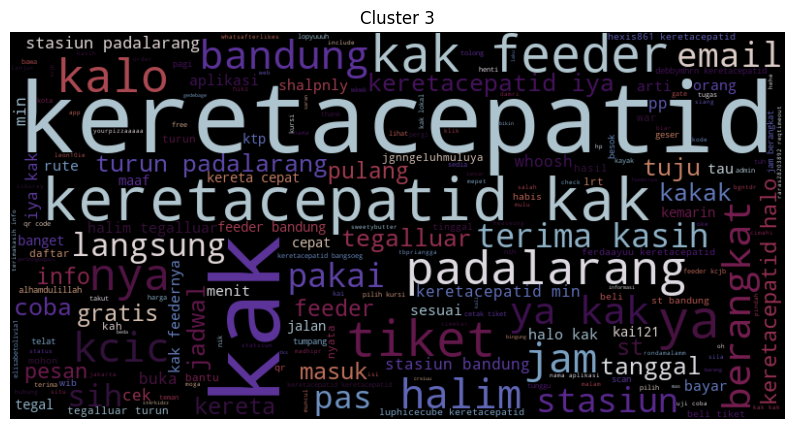

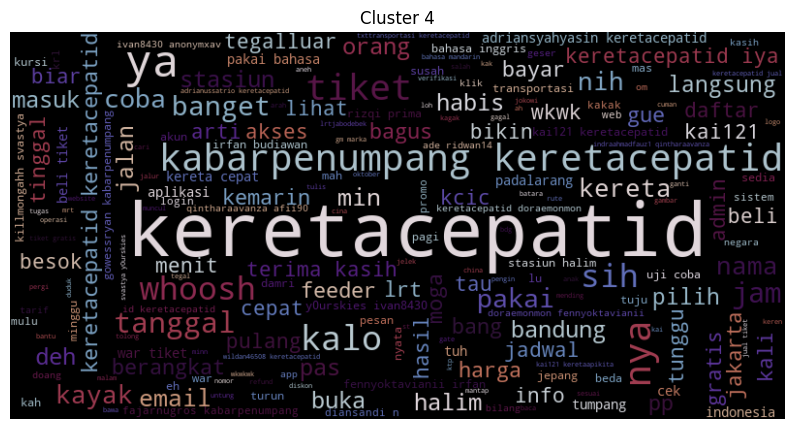

In [12]:
# for loop to print wordcloud for each cluster
for i in range(5):
    # generate the word cloud
    wc.generate(' '.join(df[df['cluster'] == i]['sanitized_tweet'].sum()))

    # plot the wordcloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster ' + str(i))
    plt.show()

### Sentimen Analisis Scoring

In [3]:
# Load the lexicon files
positive = pd.read_csv('Word Weights/positive.tsv', sep='\t')
negative = pd.read_csv('Word Weights/negative.tsv', sep='\t')

# Define a function to calculate the sentiment score of a sentence
def sentiment_score(words):
    # Use ast.literal_eval to convert the string to a list
    output_list = ast.literal_eval(words)
    # Initialize the score
    score = 0
    # Loop through the words
    for word in output_list:
        # Check if the word is in the negative lexicon
        if word in negative['word'].values:
            # print(word, float(negative[negative['word'] == word]['weight'].values[0]))
            # Subtract the weight of the word from the score
            score += float(negative[negative['word'] == word]['weight'].values[0])
        # Check if the word is in the positive lexicon
        elif word in positive['word'].values:
            # Add the weight of the word to the score
            # print(word, float(positive[positive['word'] == word]['weight'].values[0]))
            score += float(positive[positive['word'] == word]['weight'].values[0])
    # Return the score
    return score

In [5]:
df['sentiment_score'] = df['sanitized_tweet'].apply(sentiment_score)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [12]:
def sentiment_labelling(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(lambda x: sentiment_labelling(x))

In [13]:
# how many positif and negatif from sentiment column
df['sentiment'].value_counts()

sentiment
negative    4471
positive    1296
neutral     1094
Name: count, dtype: int64

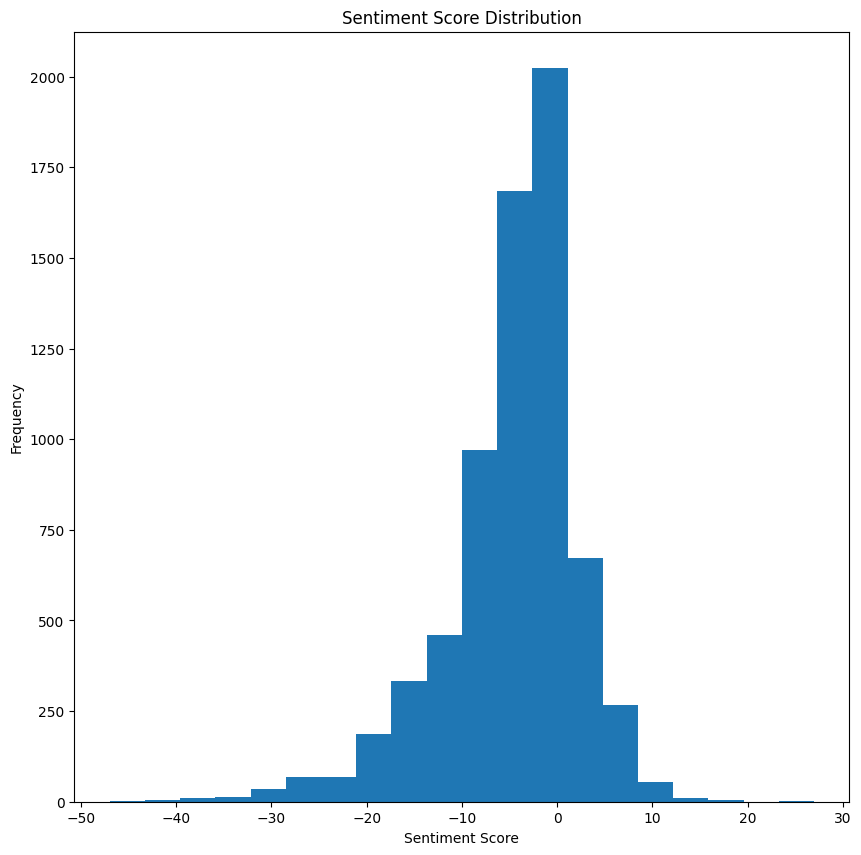

In [17]:
# histogram
plt.figure(figsize=(10, 10))
plt.hist(df['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Distribution')
plt.ylabel('Frequency')
plt.show()